### Import

In [1]:
import json
import csv
import calendar
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from termcolor import colored
from gboml import GbomlGraph
from gboml.compiler.classes import Expression 
import argparse 
from statistics import mean
import seaborn  
import matplotlib.colors as mcolors
import matplotlib
from IPython.display import display

### Folder Location

In [2]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

belgian_data_folder = os.path.join(project_root, 'Data', 'Belgian_model')
simulation_folder = os.path.join(project_root, 'Simulations')
result_folder = os.path.join(project_root, 'Results')
template_folder = os.path.join(project_root, 'Templates')
model_folder = os.path.join(project_root, 'Models GBOML')

plot_folder = os.path.join(project_root, 'Plots')

sys.path.append(os.path.join(project_root, 'Modules'))

import GBOML_function as gf
import process_funct as pf

from process_funct import merge_dictionaries as merge
from process_funct import convert_mmr_to_dict as convert

### Initialization of the dictionary 

- Where to save plot

In [3]:
scenario_plot_folder = os.path.join(project_root, 'Plots', 'Scenario all efuel') 

- The dictionnaries:

In [4]:
# model_name = "3_clusters_Belgium_base_case1year.json" 
# model_name = "scenario_base_from_article__1years.json.json"
# model_name = "scenario_no_efuels_1years.json.json"
# model_name = "scenario_with_all_efuels_1years.json.json"
# model_name = "scenario_efuel_INLAND__1years.json.json"
model_name = "scenario_efuel_INLAND__7days.json.json"

In [5]:
# Import all the JSON files and transform them into dictionaries

model = gf.MakeMeReadable(gf.json.load(open(os.path.join(simulation_folder, model_name))))
model_dict = dict()  

file_path_base = simulation_folder + "\\" + model_name   
with open (file_path_base, 'r') as myfile:
    data_base = myfile.read()
model_dict = json.loads(data_base)

- Sensitive analysis:

In [6]:
# scenarios = ['base_case']
# sensitive = ['0']
# model_dict = dict()

# for scenario in scenarios:
#     model_dict[scenario] = dict()
#     for value in sensitive:
#         name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
#         file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
#         with open (file_path, 'r') as myfile:
#             data = myfile.read() 
#         dictionary = json.loads(data)
#         model_dict[scenario][value] = {}
#         model_dict[scenario][value] = dictionary

### Time horizon setting

In [7]:
time_horizon = model.model.horizon 

# Main


## Template

- Variables 

In [8]:
e_variable = ['e_produced','e_consumed','e_discharged', 'e_charged', 'e_imported', 'e_exported', 'e_forward_out', 'e_reverse_in', 'e_curtailement','e_balanced']
h2_variable = ['h2_produced','h2_consumed','h2_discharged', 'h2_charged', 'h2_imported', 'h2_exported','h2_balanced']
co2_variable = ['co2_produced','co2_consumed','co2_discharged', 'co2_charged', 'co2_imported', 'co2_exported','co2_captured','co2_balanced']
ng_variable = ['ng_produced','ng_consumed','ng_discharged', 'ng_charged', 'ng_imported', 'ng_exported','ng_balanced']
h2o_variable = ['h2o_produced','h2o_consumed','h2o_discharged', 'h2o_charged', 'h2o_imported', 'h2o_exported','h2o_balanced']


dme_variable = ['dme_produced','dme_consumed','dme_discharged','dme_charged','dme_imported','dme_exported','dme_balanced' ]
dme_demand = ['dme_id_cook', 'dme_agr_enrg', 'dme_tr_road', 'dme_tr_av', 'dme_tr_sh']

propanol_variable = ['propanol_produced','propanol_consumed','propanol_discharged','propanol_charged','propanol_imported','propanol_exported','propanol_balanced']
propanol_demand = ['propanol_id_cook', 'propanol_agr_enrg', 'propanol_tr_road', 'propanol_tr_av', 'propanol_tr_sh']

ethanol_variable = ['ethanol_produced','ethanol_consumed','ethanol_discharged','ethanol_charged','ethanol_imported','ethanol_exported','ethanol_balanced']
ethanol_demand = ['ethanol_id_cook', 'ethanol_agr_enrg', 'ethanol_tr_road', 'ethanol_tr_av', 'ethanol_tr_sh']

methanol_variable = ['methanol_produced','methanol_consumed','methanol_discharged','methanol_charged','methanol_imported','methanol_exported','methanol_balanced']
methanol_demand = ['methanol_id_cook', 'methanol_agr_enrg', 'methanol_tr_road', 'methanol_tr_av', 'methanol_tr_sh']

diesel_variable = ['diesel_produced','diesel_consumed','diesel_discharged','diesel_charged','diesel_imported','diesel_exported','diesel_balanced']
diesel_demand = ['diesel_id_cook', 'diesel_agr_enrg', 'diesel_tr_road', 'diesel_tr_av', 'diesel_tr_sh']

gasoline_variable = ['gasoline_produced','gasoline_consumed','gasoline_discharged','gasoline_charged','gasoline_imported','gasoline_exported','gasoline_balanced']
gasoline_demand = ['gasoline_id_cook', 'gasoline_agr_enrg', 'gasoline_tr_road', 'gasoline_tr_av', 'gasoline_tr_sh']

kerosene_variable = ['kerosene_produced','kerosene_consumed','kerosene_discharged','kerosene_charged','kerosene_imported','kerosene_exported','kerosene_balanced'] 
kerosene_demand = ['kerosene_id_cook', 'kerosene_agr_enrg', 'kerosene_tr_road', 'kerosene_tr_av', 'kerosene_tr_sh'] 

- Parameter 

In [9]:
parameter = ['capex', 'fom', 'max_capacity', 'pre_installed_capacity']

- Global parameter (generally for demand)

In [10]:
e_demand = ['demand_el', 'demand_el_ht', 'demand_el_tr_road']  
h2_demand = ['demand_h2_id', 'demand_h2_ht', 'demand_h2_tr_road', 'demand_h2_tr_av', 'demand_h2_tr_sh', 'demand_h2_tr_rail']
ng_demand = ['demand_ng_id', 'demand_ng_tr_road', 'demand_ng_tr_sh', 'demand_ng_ht']
efuel_demand = ['demand_efuel_id_cook', 'demand_efuel_agr_enrg', 'demand_efuel_tr_road', 'demand_efuel_tr_av', 'demand_efuel_tr_sh']

### Dictionary

- Base commodities:

In [11]:
model_e_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = e_variable, global_parameter= e_demand, to_print='no')
model_e_obj = gf.MakeMeReadable(model_e_dict)

model_h2_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = h2_variable, global_parameter= h2_demand, to_print='no')
model_h2_obj = gf.MakeMeReadable(model_h2_dict)

model_ng_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = ng_variable, global_parameter= ng_demand, to_print='no')
model_ng_obj = gf.MakeMeReadable(model_ng_dict)

model_co2_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = co2_variable, to_print='no')
model_co2_obj = gf.MakeMeReadable(model_co2_dict)

model_h2o_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = h2o_variable, to_print='no')
model_h2o_obj = gf.MakeMeReadable(model_h2o_dict)

- Efuels

In [12]:
### DME 
model_dme_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = dme_variable, to_print='no')
model_dme_obj = gf.MakeMeReadable(model_dme_dict)

model_dme_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = dme_demand, to_print='no')
model_dme_demand_obj = gf.MakeMeReadable(model_dme_demand_dict)

### Ethanol
model_ethanol_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = ethanol_variable, to_print='no')
model_ethanol_obj = gf.MakeMeReadable(model_ethanol_dict)

model_ethanol_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = ethanol_demand, to_print='no')
model_ethanol_demand_obj = gf.MakeMeReadable(model_ethanol_demand_dict)

### Propanol
model_propanol_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = propanol_variable, to_print='no')
model_propanol_obj = gf.MakeMeReadable(model_propanol_dict)

model_propanol_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = propanol_demand, to_print='no')
model_propanol_demand_obj = gf.MakeMeReadable(model_propanol_demand_dict)

### Methanol
model_methanol_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = methanol_variable, to_print='no')
model_methanol_obj = gf.MakeMeReadable(model_methanol_dict)

model_methanol_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = methanol_demand, to_print='no')
model_methanol_demand_obj = gf.MakeMeReadable(model_methanol_demand_dict)

### Diesel
model_diesel_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = diesel_variable, to_print='no')
model_diesel_obj = gf.MakeMeReadable(model_diesel_dict)

model_diesel_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = diesel_demand, to_print='no')
model_diesel_demand_obj = gf.MakeMeReadable(model_diesel_demand_dict)

### Gasoline
model_gasoline_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = gasoline_variable, to_print='no')
model_gasoline_obj = gf.MakeMeReadable(model_gasoline_dict)

model_gasoline_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = gasoline_demand, to_print='no')
model_gasoline_demand_obj = gf.MakeMeReadable(model_gasoline_demand_dict)

### Kerosene
model_kerosene_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = kerosene_variable, to_print='no')
model_kerosene_obj = gf.MakeMeReadable(model_kerosene_dict)

model_kerosene_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = kerosene_demand, to_print='no')
model_kerosene_demand_obj = gf.MakeMeReadable(model_kerosene_demand_dict)

model_efuel_demand_dict = pf.get_all_from_variable_and_parameter(model_dict, global_parameter = efuel_demand, to_print='no')
model_efuel_demand_obj = gf.MakeMeReadable(model_efuel_demand_dict)

In [13]:
test = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(model_efuel_demand_obj.global_parameters)) 

,demand_efuel_id_cook,demand_efuel_agr_enrg,demand_efuel_tr_road,demand_efuel_tr_av,demand_efuel_tr_sh
demand_efuel_id_cook,"[0.3518373172374429, 0.3518373172374429, 0.351...",NaN,NaN,NaN,NaN
demand_efuel_agr_enrg,NaN,"[0.3110157213470319, 0.3110157213470319, 0.311...",NaN,NaN,NaN
demand_efuel_tr_road,NaN,NaN,"[0.021217152427355182, 0.03961808390128207, 0....",NaN,NaN
demand_efuel_tr_av,NaN,NaN,NaN,"[0.7385265606164382, 0.7385265606164382, 0.738...",NaN
demand_efuel_tr_sh,NaN,NaN,NaN,NaN,"[0.04484397557363533, 0.08373566588760156, 0.1..."


In [17]:
dico = [model_dme_obj, model_ethanol_obj, model_propanol_obj, model_methanol_obj, model_diesel_obj, model_gasoline_obj, model_kerosene_obj]

   

for d in dico: 
    buffer = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(d.variables.INLAND))  
    # buffer = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(d.capacities.INLAND))  
    # model_efuel_energy = merge(convert(d.variables.INLAND.h2_produced), convert(d.variables.ZEEBRUGGE.h2_produced) , convert(d.variables.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
    # model_efuel_cap = merge(convert(d.capacities.INLAND.h2_produced), convert(d.capacities.ZEEBRUGGE.h2_produced) , convert(d.capacities.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
    # model_efuel_cap_table = pf.transform_dict_into_table_several_column(model_efuel_cap)

    # model_efuel_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_efuel_energy, capacity_dict= model_efuel_cap,
    #                         unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')


,dme_produced,dme_discharged,dme_charged,dme_balanced
DME_PLANTS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
DME_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,ethanol_produced,ethanol_discharged,ethanol_charged,ethanol_balanced
BIOETH_PLANTS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
CELLETH_PLANTS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
ETH_PROP_PLANTS,"[1.3254564104654807, 1.325456410465481, 1.3254...",NaN,NaN,NaN
ETHANOL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[1.3254564104654807, 1.325456410465481, 1.3254..."


,propanol_produced,propanol_discharged,propanol_charged,propanol_balanced
ETH_PROP_PLANTS,"[0.3110157213470319, 0.3110157213470319, 0.311...",NaN,NaN,NaN
PROPANOL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[0.3110157213470319, 0.3110157213470319, 0.311..."


,methanol_produced,methanol_discharged,methanol_charged,methanol_balanced
METHANOL_PLANTS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
METHANOL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,diesel_produced,diesel_discharged,diesel_charged,diesel_balanced
REFINERY,"[249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249...",NaN,NaN,NaN
REFINED_PETROL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249..."


,gasoline_produced,gasoline_discharged,gasoline_charged,gasoline_balanced
REFINERY,"[312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312...",NaN,NaN,NaN
REFINED_PETROL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312..."


,kerosene_produced,kerosene_discharged,kerosene_charged,kerosene_balanced
REFINERY,"[439.0, 439.0, 439.0, 439.0, 439.0, 439.0, 439...",NaN,NaN,NaN
REFINED_PETROL_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[439.0, 439.0, 439.0, 439.0, 439.0, 439.0, 439..."


In [34]:
dico = [model_dme_demand_obj, model_ethanol_demand_obj, model_propanol_demand_obj, model_methanol_demand_obj, model_diesel_demand_obj, model_gasoline_demand_obj, model_kerosene_demand_obj]

efuel_dict = {}

for d in dico: 
    buffer = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(d.variables.INLAND))  

,dme_agr_enrg,dme_tr_road,dme_tr_sh
DEMAND,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,ethanol_id_cook,ethanol_tr_road,ethanol_tr_sh
DEMAND,"[0.3518373172374429, 0.3518373172374429, 0.351...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9736190932280377, 0.973619093228038, 0.9736..."


,propanol_id_cook,propanol_agr_enrg
DEMAND,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3110157213470319, 0.3110157213470319, 0.311..."


,methanol_id_cook,methanol_agr_enrg,methanol_tr_road,methanol_tr_sh
DEMAND,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


,diesel_tr_road,diesel_tr_sh
DEMAND,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 249.0, 249.0, 0...","[249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 0.0..."


,gasoline_tr_road,gasoline_tr_sh
DEMAND,"[312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


""


### Capacity check

#### Basic commodities:

Electricity:


,BIOMASS (INLAND),CCGT (INLAND),CHP (INLAND),FUEL_CELLS (INLAND),NUCLEAR (INLAND),OCGT (INLAND),PV (INLAND),WASTE (INLAND),WIND_ONSHORE (INLAND),FUEL_CELLS (OFFSHORE),WIND_OFFSHORE (OFFSHORE)
Preinstalled capacity,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Added capacity,0.0,14.277175,0.0,0.0,0.0,0.0,41.723754,0.0,9.0,0.0,8.0
Total capacity,0.0,14.277175,0.0,0.0,0.0,0.0,41.723754,0.0,9.0,0.0,8.0
Max capacity,0.0,100.000000,0.0,100.0,0.0,100.0,50.000000,0.0,9.0,100.0,8.0


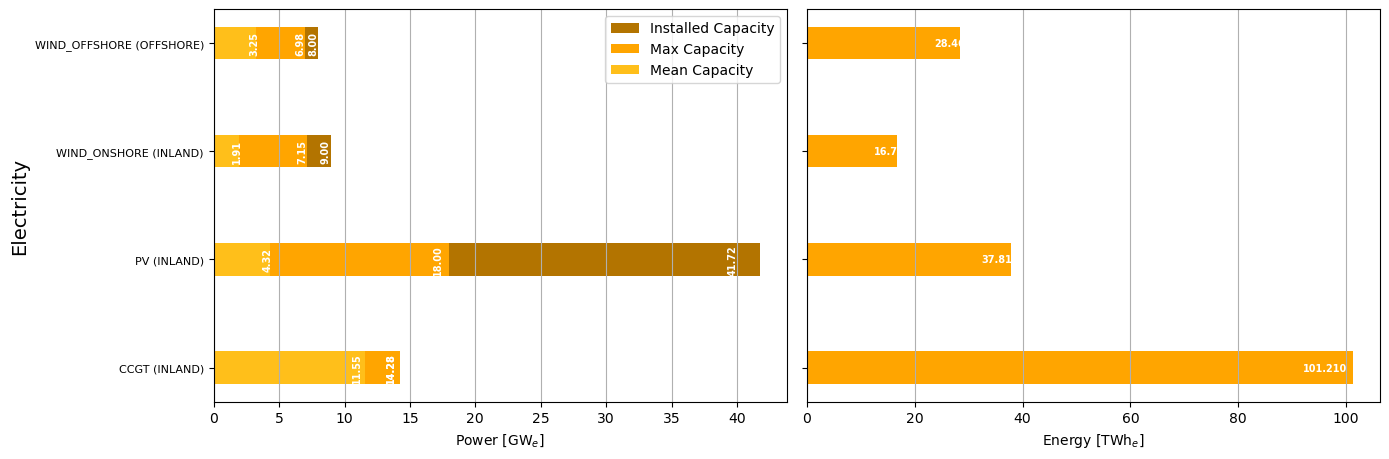

Gas:


,BIOMETHANE (INLAND),METHANATION (INLAND)
Preinstalled capacity,0.000000,0.000000
Added capacity,0.000000,0.223925
Total capacity,0.000000,0.223925
Max capacity,2.411048,100.000000


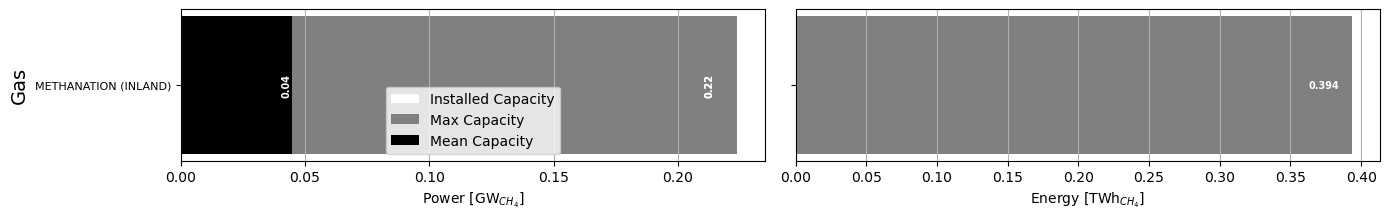

Hydrogen:


,ELECTROLYSIS_PLANTS (INLAND),SMR (INLAND),ELECTROLYSIS_PLANTS (ZEEBRUGGE),ELECTROLYSIS_PLANTS (OFFSHORE)
Preinstalled capacity,0.0,0.0,0.0,0.0
Added capacity,0.0,0.0,0.0,0.0
Total capacity,0.0,0.0,0.0,0.0
Max capacity,100.0,100.0,100.0,100.0


❌ No data to display (all capacities are zero after scaling).
Carbon dioxide:


,BIOMETHANE (INLAND),DAC (INLAND),PCCC_BM (INLAND),PCCC_CCGT (INLAND),PCCC_CHP (INLAND),PCCC_DME (INLAND),PCCC_FT (INLAND),PCCC_MEOH (INLAND),PCCC_OCGT (INLAND),PCCC_SMR (INLAND),PCCC_WS (INLAND)
Preinstalled capacity,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Added capacity,0.000000,0.0,0.0,4.325984,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total capacity,0.000000,0.0,0.0,4.325984,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max capacity,2.411048,3.5,5.0,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0


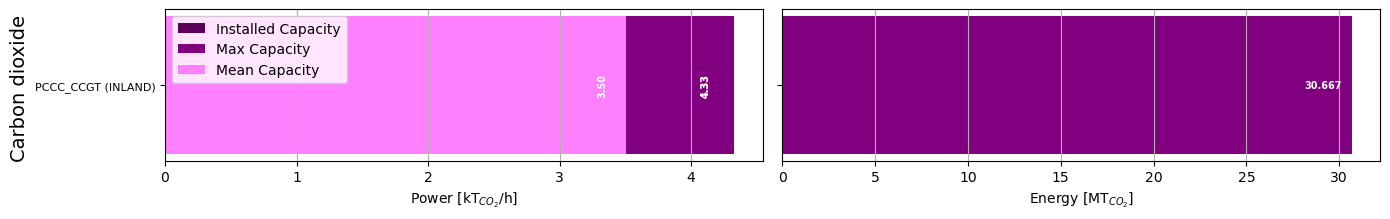

Water:


,DESALINATION (OFFSHORE),FUEL_CELLS (OFFSHORE)
Preinstalled capacity,0,0.0
Added capacity,0.0,0.0
Total capacity,0.0,0.0
Max capacity,Not given,100.0


❌ No data to display (all capacities are zero after scaling).


In [24]:
print(colored('Electricity:','red'))

try:
    model_e_energy = merge(convert(model_e_obj.variables.INLAND.e_produced), convert(model_e_obj.variables.OFFSHORE.e_produced), name=['INLAND' , 'OFFSHORE'])
    model_e_cap = merge(convert(model_e_obj.capacities.INLAND.e_produced), convert(model_e_obj.capacities.OFFSHORE.e_produced), name=['INLAND' , 'OFFSHORE'])
    model_e_cap_table = pf.transform_dict_into_table_several_column(model_e_cap)

    model_e_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_e_energy, capacity_dict= model_e_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    # model_e_prod_cap_table = pf.transform_dict_into_table_several_column(model_e_prod_cap)

    pf.bar_ploter_stack_dict(data=model_e_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_e$]', ener_unit = 'Energy [TWh$_e$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Electricity', plot_folder = scenario_plot_folder) 
except Exception as e:
    print("⚠️ Skipping Electricity block – dictionary is empty or invalid:", str(e))
    print('')





print(colored('Gas:','black'))

try:
    model_ng_energy = merge(convert(model_ng_obj.variables.INLAND.ng_produced),name=['INLAND' ])
    model_ng_cap = merge(convert(model_ng_obj.capacities.INLAND.ng_produced),name=['INLAND' ])  
    model_ng_cap_table = pf.transform_dict_into_table_several_column(model_ng_cap)

    model_ng_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_ng_energy,  capacity_dict= model_ng_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    # model_ng_prod_cap_table = pf.transform_dict_into_table_several_column(model_ng_prod_cap)

    pf.bar_ploter_stack_dict(data=model_ng_prod_cap, color_palette = 'grey', cap_unit = 'Power [GW$_{CH_4}$]', ener_unit = 'Energy [TWh$_{CH_4}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Gas', plot_folder = scenario_plot_folder) 

except Exception as e:
    print("⚠️ Skipping Natural gas block – dictionary is empty or invalid:", str(e))
    print('')





print(colored('Hydrogen:','green'))

try:
    model_h2_energy = merge(convert(model_h2_obj.variables.INLAND.h2_produced), convert(model_h2_obj.variables.ZEEBRUGGE.h2_produced) , convert(model_h2_obj.variables.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
    model_h2_cap = merge(convert(model_h2_obj.capacities.INLAND.h2_produced), convert(model_h2_obj.capacities.ZEEBRUGGE.h2_produced) , convert(model_h2_obj.capacities.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
    model_h2_cap_table = pf.transform_dict_into_table_several_column(model_h2_cap)

    model_h2_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_h2_energy, capacity_dict= model_h2_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    # model_h2_prod_cap = pf.transform_dict_into_table_several_column(model_h2_prod_cap)

    pf.bar_ploter_stack_dict(data=model_h2_prod_cap, color_palette = 'green', cap_unit = 'Power [GW$_{H_2}$]', ener_unit = 'Energy [TWh$_{H_2}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Hydrogen ', plot_folder = scenario_plot_folder) 

except Exception as e:
    print("⚠️ Skipping Hydrogen block – dictionary is empty or invalid:", str(e))
    print('')
    
    
    
    
print(colored('Carbon dioxide:','magenta'))

try: 
    model_co2_energy = merge(convert(model_co2_obj.variables.INLAND.co2_captured), name=['INLAND'])
    model_co2_cap = merge(convert(model_co2_obj.capacities.INLAND.co2_captured), name=['INLAND'])
    model_co2_cap_table = pf.transform_dict_into_table_several_column(model_co2_cap)

    model_co2_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_co2_energy, capacity_dict= model_co2_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    # model_co2_prod_cap = pf.transform_dict_into_table_several_column(model_co2_prod_cap)

    pf.bar_ploter_stack_dict(data=model_co2_prod_cap, color_palette = 'purple', cap_unit = 'Power [kT$_{CO_2}$/h]', ener_unit = 'Energy [MT$_{CO_2}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Carbon dioxide ', plot_folder = scenario_plot_folder) 

except Exception as e:
    print("⚠️ Skipping Carbon dioxide block – dictionary is empty or invalid:", str(e))
    print('')
    
    
    

print(colored('Water:','blue'))

try: 
    model_h2o_energy = merge(convert(model_h2o_obj.variables.OFFSHORE.h2o_produced), name=['OFFSHORE'])
    model_h2o_cap = merge(convert(model_h2o_obj.capacities.OFFSHORE.h2o_produced), name=['OFFSHORE'])
    model_h2o_cap_table = pf.transform_dict_into_table_several_column(model_h2o_cap)

    model_h2o_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_h2o_energy, capacity_dict= model_h2o_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    # model_h2o_prod_cap = pf.transform_dict_into_table_several_column(model_h2o_prod_cap)

    pf.bar_ploter_stack_dict(data=model_h2o_prod_cap, color_palette = 'blue', cap_unit = 'Power [T$_{H_2O}$/h]', ener_unit = 'Energy [kT$_{H_2O}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Water ', multiply=1000, plot_folder = scenario_plot_folder)

except Exception as e:
    print("⚠️ Skipping Water block – dictionary is empty or invalid:", str(e))
    print('') 


#### Efuels

In [18]:
dme_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(model_dme_obj.variables.INLAND)) 

,dme_produced,dme_discharged,dme_charged,dme_balanced
DME_PLANTS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
DME_STORAGE,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
BALANCE,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
print(colored('DME:','black','on_magenta'))

try:
    model_dme_energy = merge(convert(model_dme_obj.variables.INLAND.dme_produced), convert(model_dme_obj.variables.OFFSHORE.dme_produced), name=['INLAND' , 'OFFSHORE'])
    model_dme_cap = merge(convert(model_dme_obj.capacities.INLAND.dme_produced), convert(model_dme_obj.capacities.OFFSHORE.dme_produced), name=['INLAND' , 'OFFSHORE'])
    model_dme_cap_table = pf.transform_dict_into_table_several_column(model_dme_cap)

    model_dme_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_dme_energy, capacity_dict= model_dme_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')
 

    pf.bar_ploter_stack_dict(data=model_dme_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{DME}$]', ener_unit = 'Energy [TWh$_{DME}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'DME', plot_folder = scenario_plot_folder) 
    
except Exception as e:
    print("⚠️ Skipping DME block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Ethanol:','black','on_magenta'))

try:
    model_ethanol_energy = merge(convert(model_ethanol_obj.variables.INLAND.ethanol_produced), convert(model_ethanol_obj.variables.OFFSHORE.ethanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_ethanol_cap = merge(convert(model_ethanol_obj.capacities.INLAND.ethanol_produced), convert(model_ethanol_obj.capacities.OFFSHORE.ethanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_ethanol_cap_table = pf.transform_dict_into_table_several_column(model_ethanol_cap)

    model_ethanol_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_ethanol_energy, capacity_dict= model_ethanol_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

    pf.bar_ploter_stack_dict(data=model_ethanol_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Ethanol}$]', ener_unit = 'Energy [TWh$_{Ethanol}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Ethanol', plot_folder = scenario_plot_folder)
    
except Exception as e:
    print("⚠️ Skipping Ethanol block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Methanol:','black','on_magenta'))

try:
    model_methanol_energy = merge(convert(model_methanol_obj.variables.INLAND.methanol_produced), convert(model_methanol_obj.variables.OFFSHORE.methanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_methanol_cap = merge(convert(model_methanol_obj.capacities.INLAND.methanol_produced), convert(model_methanol_obj.capacities.OFFSHORE.methanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_methanol_cap_table = pf.transform_dict_into_table_several_column(model_methanol_cap)

    model_methanol_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_methanol_energy, capacity_dict= model_methanol_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_methanol_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Methanol}$]', ener_unit = 'Energy [TWh$_{Methanol}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Methanol', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Methanol block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Diesel:','black','on_magenta'))

try:
    model_diesel_energy = merge(convert(model_diesel_obj.variables.INLAND.diesel_produced), convert(model_diesel_obj.variables.OFFSHORE.diesel_produced), name=['INLAND' , 'OFFSHORE'])
    model_diesel_cap = merge(convert(model_diesel_obj.capacities.INLAND.diesel_produced), convert(model_diesel_obj.capacities.OFFSHORE.diesel_produced), name=['INLAND' , 'OFFSHORE'])
    model_diesel_cap_table = pf.transform_dict_into_table_several_column(model_diesel_cap)
    
    model_diesel_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_diesel_energy, capacity_dict= model_diesel_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 
    
    pf.bar_ploter_stack_dict(data=model_diesel_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Diesel}$]', ener_unit = 'Energy [TWh$_{Diesel}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Diesel', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Diesel block – dictionary is empty or invalid:", str(e))
    print('')    
    
    
print(colored('Gasoline:','black','on_magenta'))

try:
    model_gasoline_energy = merge(convert(model_gasoline_obj.variables.INLAND.gasoline_produced), convert(model_gasoline_obj.variables.OFFSHORE.gasoline_produced), name=['INLAND' , 'OFFSHORE'])
    model_gasoline_cap = merge(convert(model_gasoline_obj.capacities.INLAND.gasoline_produced), convert(model_gasoline_obj.capacities.OFFSHORE.gasoline_produced), name=['INLAND' , 'OFFSHORE'])
    model_gasoline_cap_table = pf.transform_dict_into_table_several_column(model_gasoline_cap)

    model_gasoline_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_gasoline_energy, capacity_dict= model_gasoline_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_gasoline_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Gasoline}$]', ener_unit = 'Energy [TWh$_{Gasoline}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Gasoline', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Gasoline block – dictionary is empty or invalid:", str(e))
    print('')
    

print(colored('Kerosene:','black','on_magenta'))

try:
    model_kerosene_energy = merge(convert(model_kerosene_obj.variables.INLAND.kerosene_produced), convert(model_kerosene_obj.variables.OFFSHORE.kerosene_produced), name=['INLAND' , 'OFFSHORE'])
    model_kerosene_cap = merge(convert(model_kerosene_obj.capacities.INLAND.kerosene_produced), convert(model_kerosene_obj.capacities.OFFSHORE.kerosene_produced), name=['INLAND' , 'OFFSHORE'])
    model_kerosene_cap_table = pf.transform_dict_into_table_several_column(model_kerosene_cap)

    model_kerosene_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_kerosene_energy, capacity_dict= model_kerosene_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_kerosene_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Kerosene}$]', ener_unit = 'Energy [TWh$_{Kerosene}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Kerosene', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Kerosene block – dictionary is empty or invalid:", str(e))
    print('')   


DME:
⚠️ Skipping DME block – dictionary is empty or invalid: 'dict' object has no attribute 'dme_produced'

Ethanol:
⚠️ Skipping Ethanol block – dictionary is empty or invalid: 'dict' object has no attribute 'ethanol_produced'

Methanol:
⚠️ Skipping Methanol block – dictionary is empty or invalid: 'dict' object has no attribute 'methanol_produced'

Diesel:
⚠️ Skipping Diesel block – dictionary is empty or invalid: 'dict' object has no attribute 'diesel_produced'

Gasoline:
⚠️ Skipping Gasoline block – dictionary is empty or invalid: 'dict' object has no attribute 'gasoline_produced'

Kerosene:
⚠️ Skipping Kerosene block – dictionary is empty or invalid: 'dict' object has no attribute 'kerosene_produced'



In [63]:
efuel_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(model_efuel_obj)) 

,variables,capacities,parameters,global_parameters
DENMARK,{},{},NaN,NaN
DEUTSCHLAND,{},{},NaN,NaN
FRANCE,{},{},NaN,NaN
HV_OFF_ZB,{},{},NaN,NaN
HV_ZB_INL,{},{},NaN,NaN
INLAND,{},{},NaN,NaN
LUXEMBOURG,{},{},NaN,NaN
NETHERLANDS,{},{},NaN,NaN
OFFSHORE,{},{},NaN,NaN
PIPE_H2_OFF_ZB,{},{},NaN,NaN
